In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

# Mengatur style untuk visualisasi
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [3]:
df = pd.read_csv('books_scraped.csv')

In [4]:
df.shape

(1000, 6)

In [5]:
df.head()

,Title,Book_category,Star_rating,Price,Stock,Quantity
0,A Light in the Attic,Poetry,Three,51.77,In stock,22
1,Tipping the Velvet,Historical Fiction,One,53.74,In stock,20
2,Soumission,Fiction,One,50.10,In stock,20
3,Sharp Objects,Mystery,Four,47.82,In stock,20
4,Sapiens: A Brief History of Humankind,History,Five,54.23,In stock,20


In [6]:
df.columns

Index(['Title', 'Book_category', 'Star_rating', 'Price', 'Stock', 'Quantity'], dtype='object')

In [7]:
df.dtypes

Title             object
Book_category     object
Star_rating       object
Price            float64
Stock             object
Quantity           int64
dtype: object

In [8]:
df.describe()

# Berikut adalah hasil yang biasanya disediakan oleh df.describe():

# count: Menampilkan jumlah total data (non-null) di setiap kolom.
# mean: Rata-rata atau nilai rata-rata dari data pada setiap kolom numerik.
# std: Standar deviasi, yang menunjukkan seberapa jauh data tersebar dari rata-rata.
# min: Nilai minimum (terendah) dalam setiap kolom.
# 25%: Kuartil pertama (Q1), yang menunjukkan nilai di bawah 25% data berada.
# 50%: Kuartil kedua (Q2), yang juga merupakan median (nilai tengah).
# 75%: Kuartil ketiga (Q3), yang menunjukkan nilai di bawah 75% data berada.
# max: Nilai maksimum (tertinggi) dalam setiap kolom.

,Price,Quantity
count,1000.00000,1000.000000
mean,35.07035,8.585000
std,14.44669,5.654622
min,10.00000,1.000000
25%,22.10750,3.000000
50%,35.98000,7.000000
75%,47.45750,14.000000
max,59.99000,22.000000


In [9]:
# Step 2: Data Preperation
# Mempersiapkan dan membersihkan data sebelum masuk ke tahap analisis:

# Menghapus kolom dan baris yang tidak relevan
# Mengidentifikasi kolom yang duplikat
# Mengganti Nama Kolom
# Pembuatan Fitur

df.head(10)

,Title,Book_category,Star_rating,Price,Stock,Quantity
0,A Light in the Attic,Poetry,Three,51.77,In stock,22
1,Tipping the Velvet,Historical Fiction,One,53.74,In stock,20
2,Soumission,Fiction,One,50.10,In stock,20
3,Sharp Objects,Mystery,Four,47.82,In stock,20
4,Sapiens: A Brief History of Humankind,History,Five,54.23,In stock,20
5,The Requiem Red,Young Adult,One,22.65,In stock,19
6,The Dirty Little Secrets of Getting Your Dream...,Business,Four,33.34,In stock,19
7,The Coming Woman: A Novel Based on the Life of...,Default,Three,17.93,In stock,19
8,The Boys in the Boat: Nine Americans and Their...,Default,Four,22.60,In stock,19
9,The Black Maria,Poetry,One,52.15,In stock,19


In [10]:
# Mengecek missing values

df.isna().sum()

Title            0
Book_category    0
Star_rating      0
Price            0
Stock            0
Quantity         0
dtype: int64

In [11]:
# Melihat Info Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1000 non-null   object 
 1   Book_category  1000 non-null   object 
 2   Star_rating    1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Stock          1000 non-null   object 
 5   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [12]:
# Melihat Baris yang Duplikat

df.duplicated().any()

np.False_

In [13]:
# Melihat Informasi Data Numerik

df.describe()

,Price,Quantity
count,1000.00000,1000.000000
mean,35.07035,8.585000
std,14.44669,5.654622
min,10.00000,1.000000
25%,22.10750,3.000000
50%,35.98000,7.000000
75%,47.45750,14.000000
max,59.99000,22.000000


In [14]:
# Melihat info data kategori

df.describe(exclude = np.number)

,Title,Book_category,Star_rating,Stock
count,1000,1000,1000,1000
unique,999,50,5,1
top,The Star-Touched Queen,Default,One,In stock
freq,2,152,226,1000


In [15]:
# Cek missing values

df.isna().sum()

Title            0
Book_category    0
Star_rating      0
Price            0
Stock            0
Quantity         0
dtype: int64

In [16]:
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = 0):
    """
    1) input : x_axis, nama kolom, tipe data harus object atau kategori
    2) output : count plot menggunakan modul seaborn, nilai unik di sumbu-x dan frekuensi di sumbu-y
    3) menggunakan bar_label untuk menampilkan frekuensi setiap nilai unik di atas masing-masing kolom pada grafik
    4) parameter 'top' digunakan untuk menentukan jumlah nilai unik teratas yang ingin ditampilkan
    """
    if x_axis: # jika kita ingin memvisualisasikan pada sumbu-x
        order = df[x_axis].value_counts().iloc[:top].index
    else:
        order = df[y_axis].value_counts().iloc[:top].index
    graph = sns.countplot(x = x_axis, 
                          y = y_axis, 
                          data = df, 
                          hue = hue, 
                          order = order, 
                          pallete = "Rdbu")
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()

In [17]:
# Membuat fungsi untuk memvisualisasikan kolom kategori menggunakan pie plot

def pie_plot(column_name, explodeIndex = None):
    """
    1) input : nama kolom, tipe data kolom harus object atau kategori
    2) explodeIndex : indeks yang ingin ditonjolkan (explode) pada pie chart
    3) output : grafik lingkaran yang menunjukkan ukuran setiap nilai unik dan persentasenya
    """
    # Membuat daftar explode dengan nilai nol sesuai jumlah nilai unik di kolom
    explodeList = [0] * df[column_name].nunique()
    
    # Memeriksa dan mengatur nilai explodeIndex
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1  # Menonjolkan bagian yang dipilih (explode)
    
    # Membuat pie plot
    plt.pie(df[column_name].value_counts(), 
            labels = df[column_name].value_counts().index, 
            shadow = True, 
            autopct = "%1.1f%%",  # Menampilkan persentase di tiap bagian
            explode = explodeList)  # Menonjolkan bagian yang dipilih
    plt.show()  # Menampilkan pie chart

In [18]:
# Membuat fungsi untuk memvisualisasikan kolom numerik menggunakan box plot

def box_plot(x_axis = None, y_axis = None):
    """
    input : x_axis, y_axis (kolom data), tipe data di y_axis harus numerik
    output : box plot untuk melihat distribusi nilai kolom seperti nilai minimum, maksimum, rata-rata, median, dan standar deviasi
    """
    # Membuat box plot menggunakan seaborn
    sns.boxplot(x = x_axis, y = y_axis, data = df)
    
    # Memeriksa apakah x_axis diisi, lalu mengatur label sumbu
    if x_axis:
        plt.ylabel(x_axis)  # Menetapkan label untuk sumbu-y dengan nama kolom di x_axis
        plt.xlabel("FRQ")  # Mengatur label sumbu-x sebagai "FRQ"
    else:
        plt.xlabel(y_axis)  # Jika x_axis tidak diisi, menetapkan label sumbu-x dengan nama kolom di y_axis
        plt.ylabel("FRQ")   # Mengatur label sumbu-y sebagai "FRQ"
    
    # Menampilkan box plot
    plt.show()

In [19]:
# Discovering type column

# see unique values

df["Star_rating"].unique()

array(['Three', 'One', 'Four', 'Five', 'Two'], dtype=object)

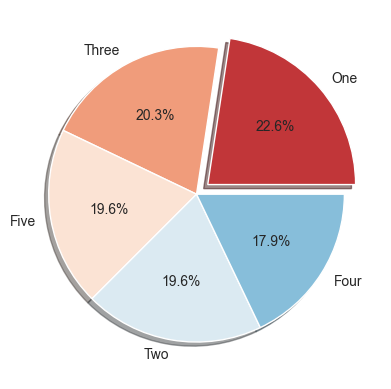

In [20]:
# visualized type column using pie plot function i create it in cell 15

pie_plot(column_name = "Star_rating", explodeIndex = 0)

In [22]:
# see unique values

df["Quantity"].unique()

array(['Poetry', 'Historical Fiction', 'Fiction', 'Mystery', 'History',
       'Young Adult', 'Business', 'Default', 'Sequential Art', 'Music',
       'Science Fiction', 'Politics', 'Travel', 'Thriller',
       'Food and Drink', 'Romance', 'Childrens', 'Nonfiction', 'Art',
       'Spirituality', 'Philosophy', 'New Adult', 'Contemporary',
       'Fantasy', 'Add a comment', 'Science', 'Health', 'Horror',
       'Self Help', 'Religion', 'Christian', 'Crime', 'Autobiography',
       'Christian Fiction', 'Biography', 'Womens Fiction', 'Erotica',
       'Cultural', 'Psychology', 'Humor', 'Historical', 'Novels',
       'Short Stories', 'Suspense', 'Classics', 'Academic',
       'Sports and Games', 'Adult Fiction', 'Parenting', 'Paranormal'],
      dtype=object)

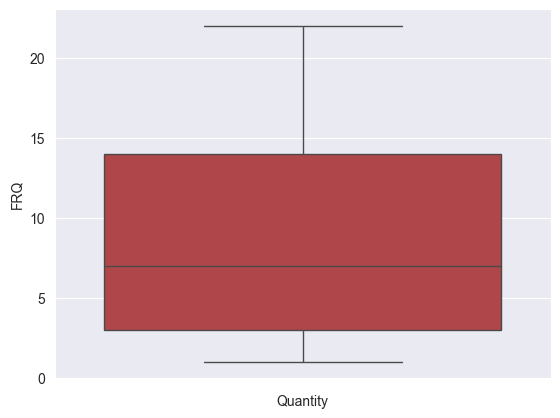

In [27]:
# EDA

df.describe()

,Price,Quantity
count,1000.00000,1000.000000
mean,35.07035,8.585000
std,14.44669,5.654622
min,10.00000,1.000000
25%,22.10750,3.000000
50%,35.98000,7.000000
75%,47.45750,14.000000
max,59.99000,22.000000


In [30]:
# Memilih kolom numerik untuk analisis statistik
numerical_columns = [
    'Price', 'Quantity'
]

# Statistik deskriptif: mean, median, std, dll.
statistics = df[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75]).T

# Menghitung mode untuk setiap kolom numerik
mode_values = df[numerical_columns].mode().iloc[0]

# Menambahkan nilai mode ke statistik
statistics['mode'] = mode_values

# Menampilkan statistik
statistics

,count,mean,std,min,25%,50%,75%,max,mode
Price,1000.0,35.07035,14.446690,10.0,22.1075,35.98,47.4575,59.99,16.28
Quantity,1000.0,8.58500,5.654622,1.0,3.0000,7.00,14.0000,22.00,3.00


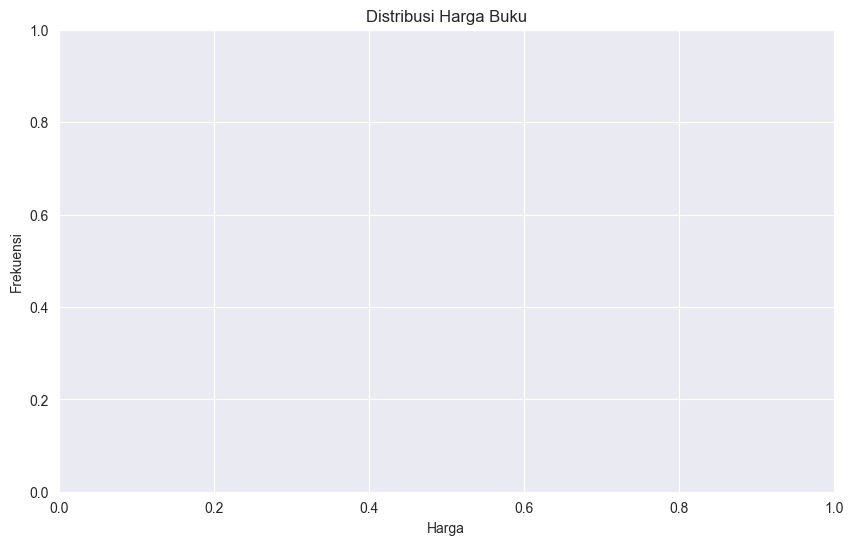

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True, color='blue')
plt.title('Distribusi Harga Buku')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

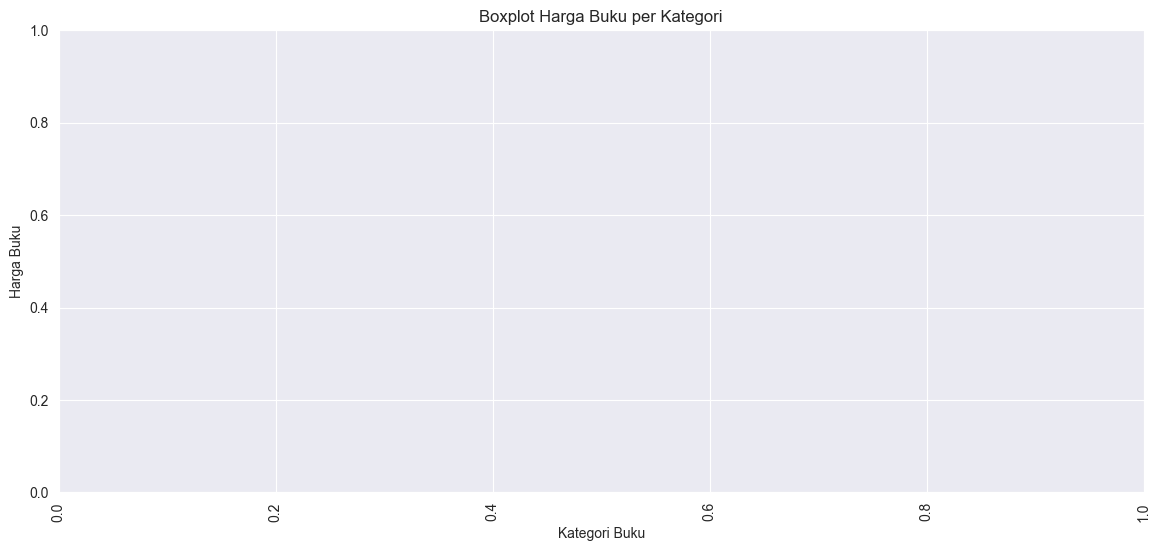

In [69]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Book_category', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot Harga Buku per Kategori')
plt.ylabel('Harga Buku')
plt.xlabel('Kategori Buku')
plt.show()

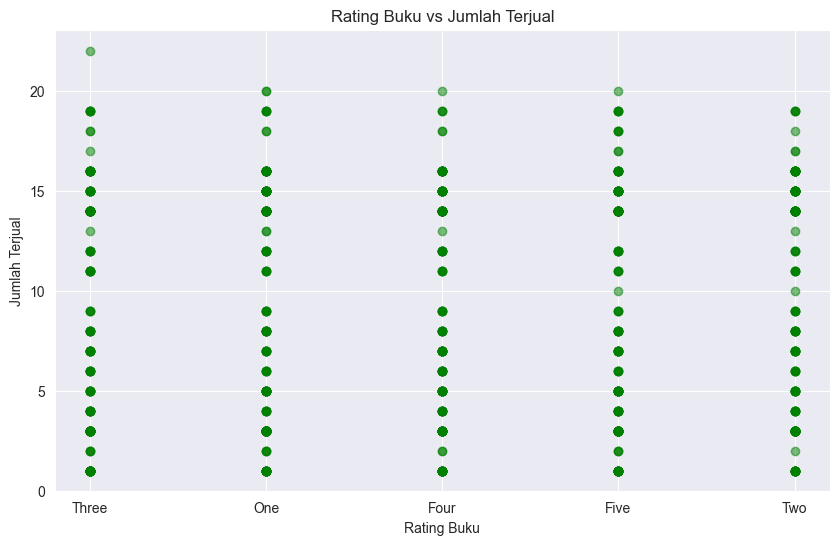

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(df['Star_rating'], df['Quantity'], alpha=0.5, color='green')
plt.title('Rating Buku vs Jumlah Terjual')
plt.xlabel('Rating Buku')
plt.ylabel('Jumlah Terjual')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

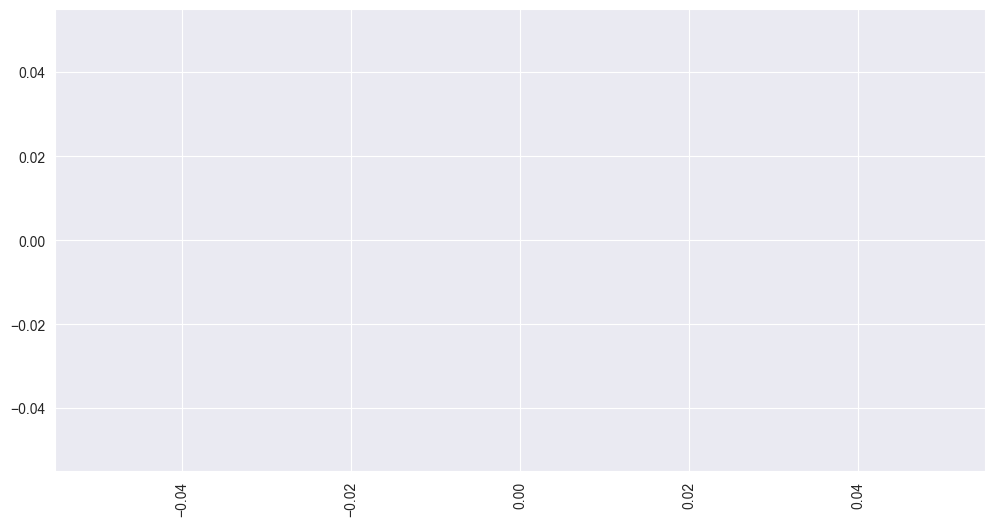

In [66]:
 # Menghitung jumlah buku per kategori
book_category_counts = df['Book_category'].value_counts()

# Bar plot jumlah buku per kategori
plt.figure(figsize=(12,6))
book_category_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Buku per Kategori')
plt.xlabel('Kategori Buku')
plt.ylabel('Jumlah Buku')
plt.xticks(rotation=45)
plt.show()

In [49]:
print(df[numerical_columns].info())
print(df[numerical_columns].head())


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        0 non-null      float64
 1   Stock        0 non-null      float64
 2   Quantity     0 non-null      int64  
 3   Star_rating  0 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 0.0 bytes
None
Empty DataFrame
Columns: [Price, Stock, Quantity, Star_rating]
Index: []


In [50]:
for col in numerical_columns:
    print(f"Kolom {col} - Nilai Unik: {df[col].unique()}")


Kolom Price - Nilai Unik: []
Kolom Stock - Nilai Unik: []
Kolom Quantity - Nilai Unik: []
Kolom Star_rating - Nilai Unik: []


In [51]:
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


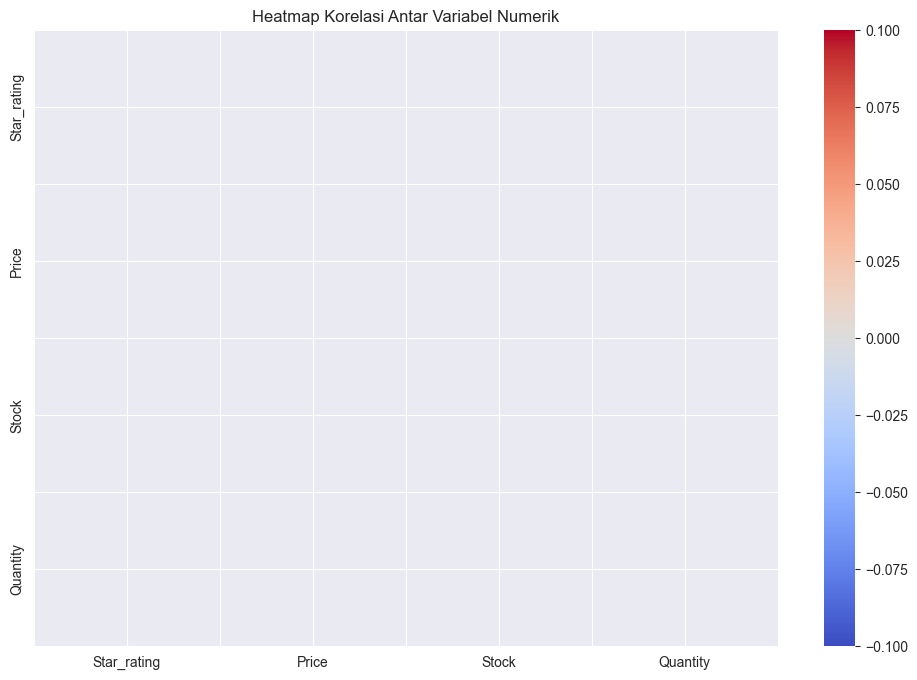

In [52]:
# Pilih semua kolom numerik dari dataset
numerical_columns = df.select_dtypes(include=['number']).columns

# Jika tidak ada kolom numerik, beri peringatan
if len(numerical_columns) == 0:
    print("Tidak ada kolom numerik yang valid untuk heatmap.")
else:
    # Hitung matriks korelasi
    correlation_matrix = df[numerical_columns].corr()

    # Plot heatmap korelasi
    plt.figure(figsize=(12,8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap Korelasi Antar Variabel Numerik')
    plt.show()


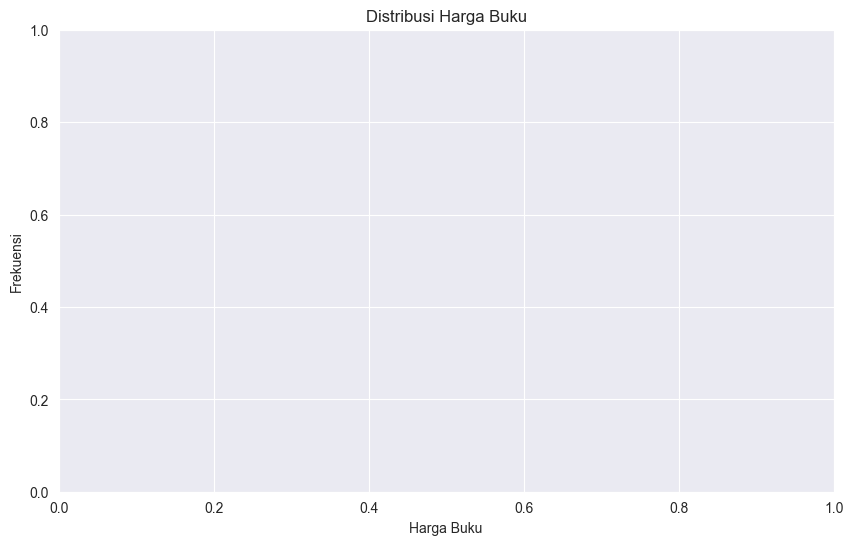

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True, color='green')
plt.title('Distribusi Harga Buku')
plt.xlabel('Harga Buku')
plt.ylabel('Frekuensi')
plt.show()


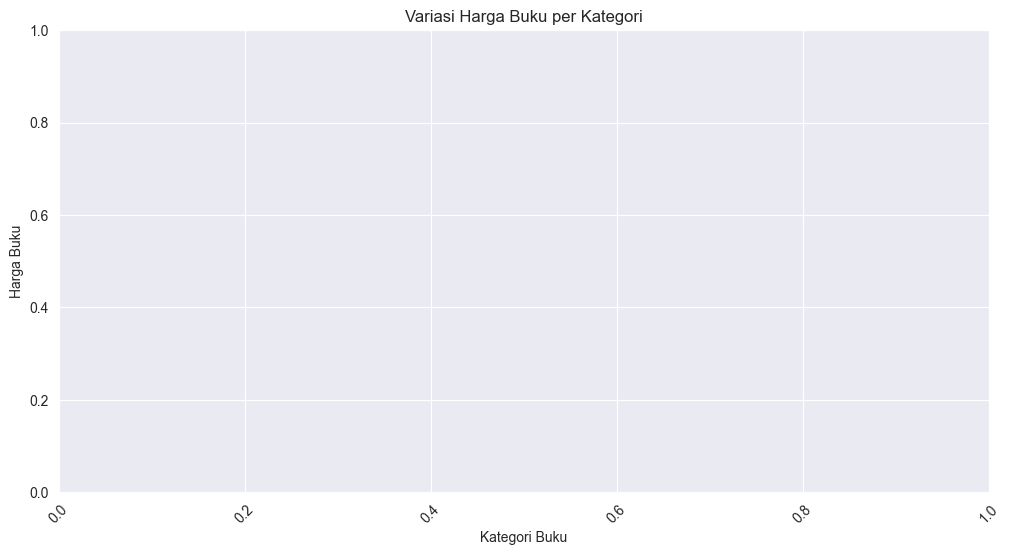

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Book_category', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Variasi Harga Buku per Kategori')
plt.xlabel('Kategori Buku')
plt.ylabel('Harga Buku')
plt.show()


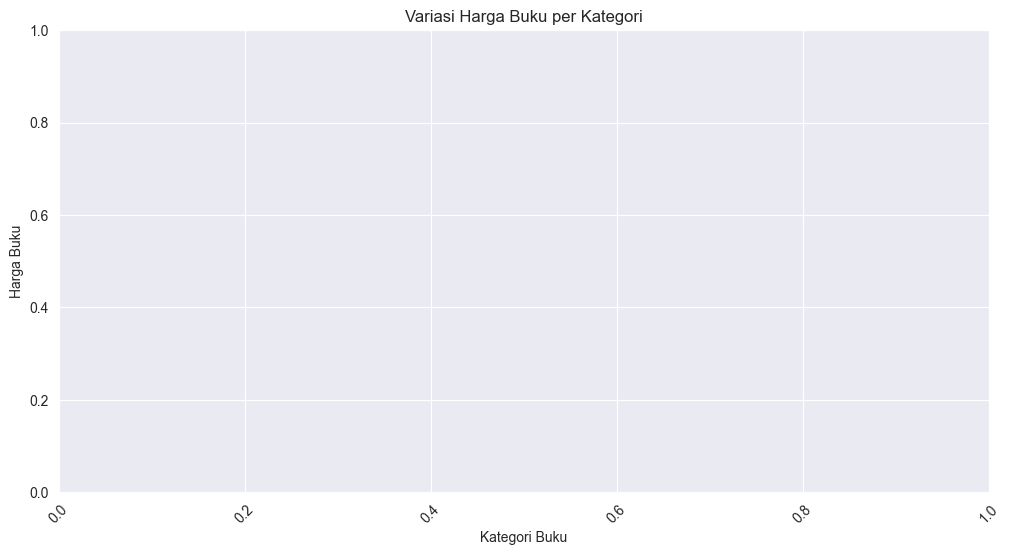

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Book_category', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Variasi Harga Buku per Kategori')
plt.xlabel('Kategori Buku')
plt.ylabel('Harga Buku')
plt.show()
